## 1 Hidden Layer : 3 neurons, 1 Output Layer
## Class + Linear network definition

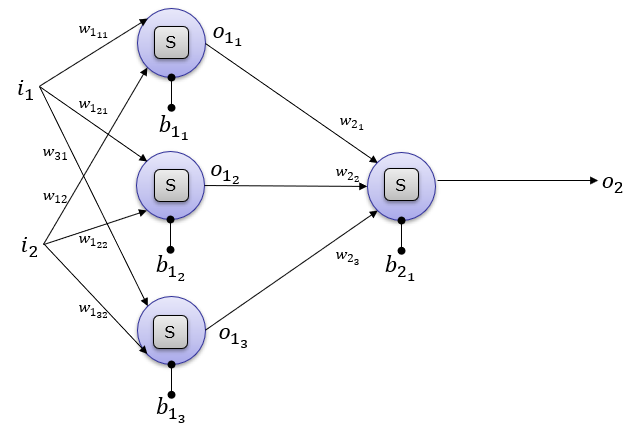

In [1]:
from IPython.display import Image
Image(filename = "nn_img/Python_Pytorch_nn_Sequential_i2_H1_n3_o1_sigmoid_01a.png", width=500)

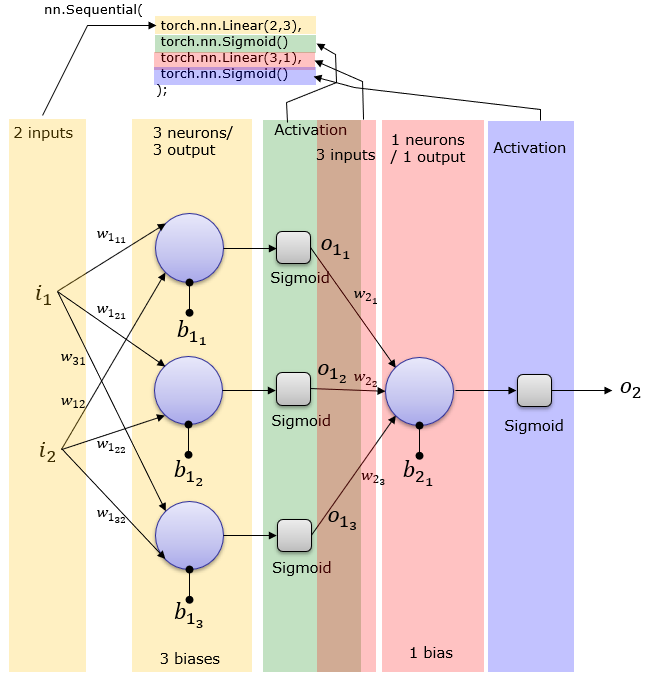

In [2]:
from IPython.display import Image
Image(filename = "nn_img/Python_Pytorch_nn_Sequential_i2_H1_n3_o1_sigmoid_01.png", width=500)

# Prerequisites

In [12]:
import torch
from torch import nn
from torch import optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from draw import display_solution

#predictive
torch.manual_seed(1);

device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')  
    
#sigmoid explicit
def sigmoid(x):
    return 1/(1+torch.exp(-x))

#sigmoid pre-defined
activation = torch.nn.Sigmoid()

# Loss (Binary Cross Entropy) error function, explicit def
def bce_err(output, target):
    return -target * torch.log(output) - (1-target) * torch.log(1-output)

#sigmoid + BCELoss (Binary Cross Entropy)
criterion = torch.nn.BCEWithLogitsLoss()

def state(interval,i,loss,out,y):
    if(i%interval == 0):
        print("\n========== Epoch", i,"==========")
        print("loss=",loss)
        accuracy = np.mean( ((out > 0.5)==y).numpy() )
        print("accuracy=",accuracy)
        
#array data points: x1, x2
data = np.array([
    [1,10,1],
    [3,10,0],
    [1.8,2.0,0],
    [-1,-1,1],
    [-2,10,1],
])         

#df = pd.read_csv('test.csv', header=None)
#df = pd.read_csv('data2.csv', header=None)
#data = df.to_numpy()        

### Class + Linear network definition

In [13]:
#        nn.Linear(input,neurons)    
linear = nn.Linear(2, 3)
linear.weight

Parameter containing:
tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319],
        [-0.6657,  0.4241]], requires_grad=True)

In [14]:
torch.manual_seed(1);

#features
x = torch.from_numpy(data[:, [0,1]]).float()
#target/labels
y = torch.from_numpy(data[:, [2]]).float()

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2,3)
        self.linear2 = nn.Linear(3,1)
        
    def forward(self,x):
        o = self.linear1(x)
        o = torch.nn.Sigmoid()(o)
        o = self.linear2(o)
        o = torch.nn.Sigmoid()(o)
        return o

net = Network()
print(net)   
print(x)
print(net.linear1.weight.data)
print(net.linear1.bias.data)
print(net.linear2.weight.data)
print(net.linear2.bias.data)
print(net.forward(x))  

Network(
  (linear1): Linear(in_features=2, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=1, bias=True)
)
tensor([[ 1.0000, 10.0000],
        [ 3.0000, 10.0000],
        [ 1.8000,  2.0000],
        [-1.0000, -1.0000],
        [-2.0000, 10.0000]])
tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319],
        [-0.6657,  0.4241]])
tensor([-0.1455,  0.3597,  0.0983])
tensor([[-0.0707,  0.1601,  0.0285]])
tensor([0.2109])
tensor([[0.5964],
        [0.5948],
        [0.5744],
        [0.5701],
        [0.5975]], grad_fn=<SigmoidBackward>)


In [6]:
#learn rate
alpha = 0.01
#iterations
epochs = 1101    #! different from 5a...
#display state
fv = 100

lossHistory = []

In [7]:
#some manual setting weights

#net[0].weight.data.fill_(0.5)
#net[0].bias.data.fill_(0.5)
#net[2].weight.data.fill_(0.5)
#net[2].bias.data.fill_(0.5)

#n_input = 2    # Number of input units, must match number of input features
#n_hidden = 2   # Number of hidden units 
#n_output = 1   # Number of output units
#w1 = torch.randn(n_input, n_hidden, dtype=torch.double, requires_grad=True)
#w2 = torch.randn(n_hidden, n_output, dtype=torch.double, requires_grad=True)
#b1 = torch.randn(1, n_hidden, dtype=torch.double, requires_grad=True)
#b2 = torch.randn(1, n_output, dtype=torch.double, requires_grad=True)
#w1 = torch.tensor( [[1, -1],
#                    [1, -1]], dtype=torch.float)
#b1 = torch.tensor( [[1, -1]], dtype=torch.float)
#w2 = torch.tensor( [[ 1],
#                    [-1]], dtype=torch.float)
#b2 = torch.tensor( [[ 1]], dtype=torch.float)
#net.load_state_dict({
#                       '0.weight': w1.T, '0.bias': b1[0],
#                       '2.weight': w2.T, '2.bias': b2[0]
#                    })
#print(net[0].weight.data)
#print(net[0].bias.data)
#print(net[2].weight.data)
#print(net[2].bias.data)

def train1():

    for i in range(epochs):

        out = net(x)
        loss = torch.mean(bce_err(out,y))

        lossHistory.append(loss)

        #print(net[0].weight.grad)
        loss.backward() 
        #print(net[0].weight.grad)

        with torch.no_grad():
            net.linear1.weight -= alpha * net.linear1.weight.grad
            net.linear1.bias   -= alpha * net.linear1.bias.grad
            net.linear2.weight -= alpha * net.linear2.weight.grad
            net.linear2.bias   -= alpha * net.linear2.bias.grad

            # Manually zero the gradients after updating weights
            net.linear1.weight.grad.zero_()
            net.linear1.bias.grad.zero_()
            net.linear2.weight.grad.zero_()
            net.linear2.bias.grad.zero_()

            state(fv,i,loss,out,y)
            
train1()            


========== Epoch 0 ==========
loss= tensor(0.6703, grad_fn=<MeanBackward0>)
accuracy= 0.6

========== Epoch 100 ==========
loss= tensor(0.6668, grad_fn=<MeanBackward0>)
accuracy= 0.6

========== Epoch 200 ==========
loss= tensor(0.6630, grad_fn=<MeanBackward0>)
accuracy= 0.6

========== Epoch 300 ==========
loss= tensor(0.6579, grad_fn=<MeanBackward0>)
accuracy= 0.6

========== Epoch 400 ==========
loss= tensor(0.6496, grad_fn=<MeanBackward0>)
accuracy= 0.6

========== Epoch 500 ==========
loss= tensor(0.6345, grad_fn=<MeanBackward0>)
accuracy= 0.6

========== Epoch 600 ==========
loss= tensor(0.6100, grad_fn=<MeanBackward0>)
accuracy= 0.6

========== Epoch 700 ==========
loss= tensor(0.5827, grad_fn=<MeanBackward0>)
accuracy= 0.6

========== Epoch 800 ==========
loss= tensor(0.5566, grad_fn=<MeanBackward0>)
accuracy= 0.6

========== Epoch 900 ==========
loss= tensor(0.5301, grad_fn=<MeanBackward0>)
accuracy= 0.6

========== Epoch 1000 ==========
loss= tensor(0.5024, grad_fn=<MeanBack

In [8]:
#Stochastic/Batch gradient descent
optimizer = optim.SGD(net.parameters(), lr=alpha)

def train2():

    for i in range(epochs):
        #forward
        out = net(x)

        #error function
        loss = torch.mean(bce_err(out,y))
        #loss = torch.mean(nn.BCELoss(out,y))
        #loss = criterion(out, y)

        lossHistory.append(loss)

        optimizer.zero_grad()

        #process gradients
        loss.backward()

        #update weights
        optimizer.step()

        state(fv,i,loss,out,y)
        
#train2()        

### Setting custom weights

In [10]:
w1 = torch.tensor( [[1, -1, 1],
                    [1, -1, 1]], dtype=torch.float64)
b1 = torch.tensor( [[1, -1, 1]], dtype=torch.float64)

w2 = torch.tensor( [[ 1],
                    [-1],
                    [ 1]], dtype=torch.float64)
b2 = torch.tensor( [[ 1]], dtype=torch.float64)

#net.load_state_dict({
#                       'linear1.weight': w1.T, 'linear1.bias': b1[0],
#                       'linear2.weight': w2.T, 'linear2.bias': b2[0]
#                    })
#or
net.linear1.load_state_dict( {'weight': w1.T, 'bias': b1[0]})
net.linear2.load_state_dict( {'weight': w2.T, 'bias': b2[0]})

print(net.state_dict())
print(net(x))
out = net.forward(x)
print("---\n",out,"\n---")

OrderedDict([('linear1.weight', tensor([[ 1.,  1.],
        [-1., -1.],
        [ 1.,  1.]])), ('linear1.bias', tensor([ 1., -1.,  1.])), ('linear2.weight', tensor([[ 1., -1.,  1.]])), ('linear2.bias', tensor([1.]))])
tensor([[0.9526],
        [0.9526],
        [0.9515],
        [0.6914],
        [0.9526]], grad_fn=<SigmoidBackward>)
---
 tensor([[0.9526],
        [0.9526],
        [0.9515],
        [0.6914],
        [0.9526]], grad_fn=<SigmoidBackward>) 
---


In [11]:
w1 = torch.tensor( [[1, 1, 1],
                    [1, 1, 1]], dtype=torch.float64)
b1 = torch.tensor( [[1, 1, 1]], dtype=torch.float64)

w2 = torch.tensor( [[ 1],
                    [ 1],
                    [ 1]], dtype=torch.float64)
b2 = torch.tensor( [[ 1]], dtype=torch.float64)

#net.load_state_dict({
#                       'linear1.weight': w1.T, 'linear1.bias': b1[0],
#                       'linear2.weight': w2.T, 'linear2.bias': b2[0]
#                    })
#or
net.linear1.load_state_dict( {'weight': w1.T, 'bias': b1[0]})
net.linear2.load_state_dict( {'weight': w2.T, 'bias': b2[0]})

print(net.state_dict())
print(net(x))
out = net.forward(x)
print("---\n",out,"\n---")

OrderedDict([('linear1.weight', tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])), ('linear1.bias', tensor([1., 1., 1.])), ('linear2.weight', tensor([[1., 1., 1.]])), ('linear2.bias', tensor([1.]))])
tensor([[0.9820],
        [0.9820],
        [0.9816],
        [0.8590],
        [0.9820]], grad_fn=<SigmoidBackward>)
---
 tensor([[0.9820],
        [0.9820],
        [0.9816],
        [0.8590],
        [0.9820]], grad_fn=<SigmoidBackward>) 
---


In [ ]:
net.linear1.weight.data.fill_(1)
net.linear1.bias.data.fill_(1)
net.linear2.weight.data.fill_(1)
net.linear2.bias.data.fill_(1)
#print(net.state_dict())
#print(x)
#print(net[0].weight)
#print(net[0].bias)
out = net(x)
print("---\n",out,"\n---")